In [5]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
# import gym

from scipy.stats import truncnorm
from torch import nn
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

torch.manual_seed(0)


Using cuda device


In [11]:
import numpy as np

a = np.array([0, 1, 2])

b = np.tile(a, (2, 1))
print(b)

[[0 1 2]
 [0 1 2]]


In [9]:
print(a.ndim)

1


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')
env = env.unwrapped
# env.render()

#vector of means(mu) and standard dev(sigma) for each paramater
mu = np.random.uniform(size=env.observation_space.shape)
sigma = np.random.uniform(low=0.001, size=env.observation_space.shape)
print(mu.shape)
print(sigma.shape)

def init_params(mu, sigma, n):
    length = mu.shape[0]
    matrix = np.zeros((n, length))
    for i in range(length):
        matrix[:, i] = np.random.normal(mu[i], sigma[i], n)
    

c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment ALE/Tetris-v5
  logger.warn("Overriding environment {}".format(id))
c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment ALE/Tetris-ram-v5
  logger.warn("Overriding environment {}".format(id))
c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment ALE/Adventure-v5
  logger.warn("Overriding environment {}".format(id))
c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment ALE/Adventure-ram-v5
  logger.warn("Overriding environment {}".format(id))
c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding enviro

(4,)
(4,)


Cross-Entropy Method

In [7]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')
env = env.unwrapped
# env.render()

#vector of means(mu) and standard dev(sigma) for each paramater
mu = np.random.uniform(size = env.observation_space.shape)
sigma = np.random.uniform(low = 0.001,size = env.observation_space.shape)
print(mu.shape)
print(sigma.shape)

def noisy_evaluation(env,W,render = False,):
    """
    uses parameter vector W to choose policy for 1 episode,
    returns reward from that episode
    """
    reward_sum = 0
    state = env.reset()
    t = 0
    while True:
      t += 1
      action = int(np.dot(W,state)>0) # use parameters/state to choose action
      state,reward,done,info = env.step(action)
      reward_sum += reward
      if render and t%3 == 0: env.render()
      if done or t > 2000: # 
            #print("finished episode, got reward:{}".format(reward_sum)) 
            break

    return reward_sum
    
def init_params(mu,sigma,n):
    """
    以mu和sigma的维度(=4)分量为均值和方差，采样n=40个点，组成n个4维向量
    """
    l = mu.shape[0] # l=4
    w_matrix = np.zeros((n,l))
    for p in range(l):
        w_matrix[:,p] = np.random.normal(loc = mu[p],scale = sigma[p]+1e-7,size = (n,))
    return w_matrix

def get_constant_noise(step):
    return np.clip(5-step/10., a_max=1,a_min=0.5)

running_reward = 0
n = 40;p = 8;n_iter = 40;render = False 

state = env.reset()
i = 0
while i < n_iter:
    #initialize an array of parameter vectors
    wvector_array = init_params(mu,sigma,n)
    reward_sums = np.zeros((n))
    for k in range(n):
        #sample rewards based on policy parameters in row k of wvector_array
        reward_sums[k] = noisy_evaluation(env,wvector_array[k,:],render)

    #sort params/vectors based on total reward of an episode using that policy
    rankings = np.argsort(reward_sums)
    #pick p vectors with highest reward
    top_vectors = wvector_array[rankings,:]
    top_vectors = top_vectors[-p:,:]
    print("top vectors shpae:{}".format(top_vectors.shape))
    #fit new gaussian from which to sample policy
    for q in range(top_vectors.shape[1]):
        mu[q] = top_vectors[:,q].mean()
        sigma[q] = top_vectors[:,q].std()+get_constant_noise(i) # 在方差更新项加入扰动

    running_reward = 0.99*running_reward + 0.01*reward_sums.mean()
    print("#############################################################################")
    print("iteration:{},mean reward:{}, running reward mean:{} \n"
            " reward range:{} to {},".format(
                i, reward_sums.mean(),running_reward,reward_sums.min(),reward_sums.max(),
                ))
    i += 1


c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment ALE/Tetris-v5
  logger.warn("Overriding environment {}".format(id))
c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment ALE/Tetris-ram-v5
  logger.warn("Overriding environment {}".format(id))
c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment ALE/Adventure-v5
  logger.warn("Overriding environment {}".format(id))
c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment ALE/Adventure-ram-v5
  logger.warn("Overriding environment {}".format(id))
c:\Users\37103\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding enviro

(4,)
(4,)
top vectors shpae:(8, 4)
#############################################################################
iteration:0,mean reward:50.225, running reward mean:0.50225 
 reward range:8.0 to 186.0,
top vectors shpae:(8, 4)
#############################################################################
iteration:1,mean reward:232.35, running reward mean:2.8207275000000003 
 reward range:8.0 to 2001.0,
top vectors shpae:(8, 4)
#############################################################################
iteration:2,mean reward:701.125, running reward mean:9.803770225000001 
 reward range:9.0 to 2001.0,
top vectors shpae:(8, 4)
#############################################################################
iteration:3,mean reward:561.85, running reward mean:15.324232522750002 
 reward range:9.0 to 2001.0,
top vectors shpae:(8, 4)
#############################################################################
iteration:4,mean reward:662.45, running reward mean:21.7954901975225 
 reward range

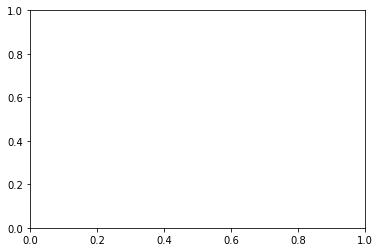

In [6]:
fig, ax = plt.subplots(1, 1)


In [17]:
env = gym.make('Pendulum-v1')
env.reset()
env.step(0)

IndexError: invalid index to scalar variable.

In [18]:
test = torch.distributions.Normal(0, 1)
a = test.sample([100])
print(a)
env = gym.make('Pendulum-v1')
env.reset()
for i in range(100):
    env.step([a[i].item()])

tensor([ 0.7971, -0.4961, -1.2703,  1.1654, -0.0565,  0.6403, -0.3034, -0.1086,
         1.7811,  0.1753, -0.5432, -0.5849,  0.7844, -1.3536,  0.1280,  1.3753,
         0.3029,  0.1993, -2.6129,  0.2757,  0.2712, -1.0442,  1.8786,  1.8543,
        -0.2045,  0.2110,  1.4388,  0.9300,  1.1896, -0.9635, -0.3666,  1.3375,
        -1.6549,  0.4933, -0.6150,  1.3119,  0.7882, -1.2330,  0.4544, -1.4366,
         0.7116,  0.5546, -0.8075,  1.6801,  0.5976, -0.2389, -0.3460,  1.7701,
         1.1617,  2.0278, -1.8071, -0.5571, -0.2271,  0.6575, -0.1183,  0.6762,
        -1.1441, -1.0940, -0.5454, -0.4822,  1.0615, -0.6378,  0.4384,  0.9643,
         0.9764, -1.0889, -0.1634,  2.2799,  0.2277,  0.0367,  0.3680,  0.9759,
         0.8760,  1.4248, -0.2724,  0.9353, -1.4920, -0.5683, -0.9277,  2.1160,
         0.5926, -0.1689, -2.2863,  0.2011, -0.6302,  0.5482,  1.0427,  0.2538,
        -1.3568, -0.7654, -0.2090, -0.2652, -0.0056, -0.1802, -0.0184,  0.9981,
        -0.8499, -0.2978,  2.1293,  0.50

In [9]:
t = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float).numpy()
print(t[::-1])

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [7]:
print(np.log(0.01))

-4.605170185988091


In [2]:
x = np.linspace(-1, 1, 1000)
y = x ** 2


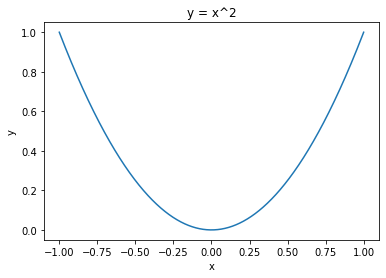

In [3]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.show()


In [18]:
class Net(torch.nn.Module):
    def __init__(self, hidden_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return x

hidden_dim = 16
    
net = Net(hidden_dim).to(device)
net.fc2.weight


Parameter containing:
tensor([[-0.0482,  0.0239,  0.2312,  0.0134, -0.1544,  0.0128,  0.1199,  0.1240,
         -0.2285, -0.0447, -0.1858, -0.1067,  0.0901, -0.1775,  0.0929,  0.2122]],
       device='cuda:0', requires_grad=True)

In [5]:
optim = torch.optim.Adam(net.parameters(), lr=0.01)

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1).to(device)
print(x_tensor.shape)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

for i in range(1000):
    loss = F.mse_loss(net(x_tensor).squeeze(-1), y_tensor, reduction='mean')
    
    # writer.add_scalar('Loss', loss, i)
    optim.zero_grad()
    loss.backward()
    optim.step()

torch.Size([1000, 1])


In [6]:
y_pred = net(x_tensor).detach().cpu().numpy()

In [7]:
net.fc2.weight

Parameter containing:
tensor([[-0.0876,  0.0399,  0.0404, -0.0218, -0.0509,  0.1368,  0.0411,  0.1475,
          0.0262,  0.0701, -0.0199,  0.0191,  0.0636,  0.0191, -0.0460, -0.0415,
         -0.0836,  0.2188, -0.0553, -0.0255,  0.0775,  0.0193, -0.0101,  0.0253,
          0.0028, -0.0600, -0.0500,  0.0705,  0.0048,  0.0733,  0.0622,  0.1685,
          0.0594,  0.0787, -0.0538,  0.2079,  0.0822,  0.0644, -0.0199, -0.0461,
          0.0611, -0.0008,  0.0318,  0.0749, -0.0483,  0.0184, -0.0459,  0.0211,
          0.0666, -0.0656,  0.0127,  0.2618,  0.0605, -0.0111, -0.0702,  0.0062,
          0.0258, -0.0081,  0.0978,  0.1227, -0.0462, -0.0013,  0.0283,  0.0032,
          0.0074,  0.0105, -0.0695,  0.0069,  0.2876,  0.1074,  0.1681,  0.0476,
          0.0848, -0.0348,  0.0198,  0.0444,  0.0882,  0.0553, -0.0611,  0.0264,
          0.0889,  0.1312,  0.1377,  0.1213,  0.0004, -0.0310,  0.0968,  0.0718,
         -0.0532,  0.1885,  0.0392,  0.0482,  0.0321,  0.0219, -0.0006,  0.1052,
      

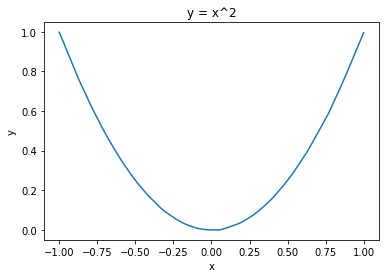

In [8]:
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.show()

In [11]:
net.parameters().data

AttributeError: 'generator' object has no attribute 'data'

In [ ]:
for i, j in enumerate(x):
    print(i, j)

In [10]:
t = torch.tensor([[1, 2, 3], [4, 5, 6]])
t.data

tensor([[1, 2, 3],
        [4, 5, 6]])

In [22]:
net.fc1.bias


Parameter containing:
tensor([ 0.0743, -0.4721,  0.9190,  0.4089, -0.7591,  0.9571,  0.7594, -0.3645,
         0.5622, -0.5682, -0.1567,  0.8491,  0.0413, -0.7072, -0.3342, -0.2714],
       device='cuda:0', requires_grad=True)

In [21]:
net.fc1.weight


Parameter containing:
tensor([[ 0.9997],
        [ 0.5187],
        [ 0.6216],
        [-0.3500],
        [ 0.4798],
        [ 0.1149],
        [-0.2388],
        [-0.5637],
        [-0.5611],
        [-0.7695],
        [ 0.6713],
        [ 0.7109],
        [-0.1138],
        [-0.5787],
        [ 0.7729],
        [ 0.6395]], device='cuda:0', requires_grad=True)

In [32]:
i = 0
for param in net.fc1.parameters():
    param0 = param.data.clone()
    print(param.detach())
    i += 1
    print(i)
    print(param.shape)
    print(param.size())

tensor([[ 0.9997],
        [ 0.5187],
        [ 0.6216],
        [-0.3500],
        [ 0.4798],
        [ 0.1149],
        [-0.2388],
        [-0.5637],
        [-0.5611],
        [-0.7695],
        [ 0.6713],
        [ 0.7109],
        [-0.1138],
        [-0.5787],
        [ 0.7729],
        [ 0.6395]], device='cuda:0')
1
torch.Size([16, 1])
torch.Size([16, 1])
tensor([ 0.0743, -0.4721,  0.9190,  0.4089, -0.7591,  0.9571,  0.7594, -0.3645,
         0.5622, -0.5682, -0.1567,  0.8491,  0.0413, -0.7072, -0.3342, -0.2714],
       device='cuda:0')
2
torch.Size([16])
torch.Size([16])


In [35]:
print(param.grad)

None
